In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
df = pd.read_csv('final_data.csv')
df.head()

,reviews,ratings
0,Review after 1 month.Best in performance!Pros-...,5
1,"Voltas - Damn good AC for the 10x10 room , it ...",5
2,I bought this one 15 days ago for 32850 rs wit...,4
3,I could say that voltas provides you best AC a...,4
4,Biggest Fraud I have ever encountered by Flipk...,1


In [3]:
df[df.duplicated('reviews')].shape

(29237, 2)

In [4]:
df.drop_duplicates(inplace=True)
df.shape

(8695, 2)

# Text Processing

In [5]:
import re
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shri0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shri0\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shri0\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
"didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
"he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
"I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
"i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
"it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
"mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
"mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
"oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
"she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
"should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
"this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
"there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
"they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
"wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
"we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
"what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
"where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
"why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
"would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
"y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
"you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
"you're": "you are", "you've": "you have"}

In [7]:
StopWords = set(stopwords.words('english')) - set(['no','not'])
lemmatizer = WordNetLemmatizer() 

def clean_text(text):
    text = text.lower() #converting input to lowercase
    text = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    text = re.sub(r'\([^)]*\)', '', text) #Removing punctuations and special characters.
    text = re.sub('"','', text) #Removing double quotes.
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")]) #Replacing contractions.   
    text = re.sub(r"'s\b","",text) #Eliminating apostrophe.
    text = re.sub("[^a-zA-Z0-9]", " ", text) #Removing non-alphabetical & numerical characters
    text = ' '.join([word for word in text.split() if word not in StopWords]) #Removing stopwords.
    text = ' '.join([word for word in text.split() if len(word) >= 3]) #Removing very short words
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

In [8]:
df.isnull().sum()

reviews    0
ratings    0
dtype: int64

In [9]:
df['bin_label'] = df['ratings'].map({1: 'negative', 2:'negative', 3:'neutral', 4:'positive', 5:'positive'})
df.head(2)

,reviews,ratings,bin_label
0,Review after 1 month.Best in performance!Pros-...,5,positive
1,"Voltas - Damn good AC for the 10x10 room , it ...",5,positive


In [10]:
df["cleaned_reviews"] = df["reviews"].progress_apply(lambda text: clean_text(text))

  0%|          | 0/8695 [00:00<?, ?it/s]

In [11]:
df['bin_label'].value_counts()

positive    6560
negative    1560
neutral      575
Name: bin_label, dtype: int64

# EDA

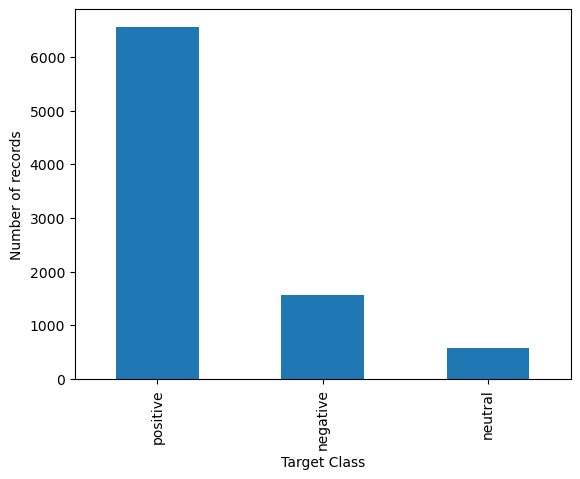

In [12]:
### Imbalanced Data

count = df['bin_label'].value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

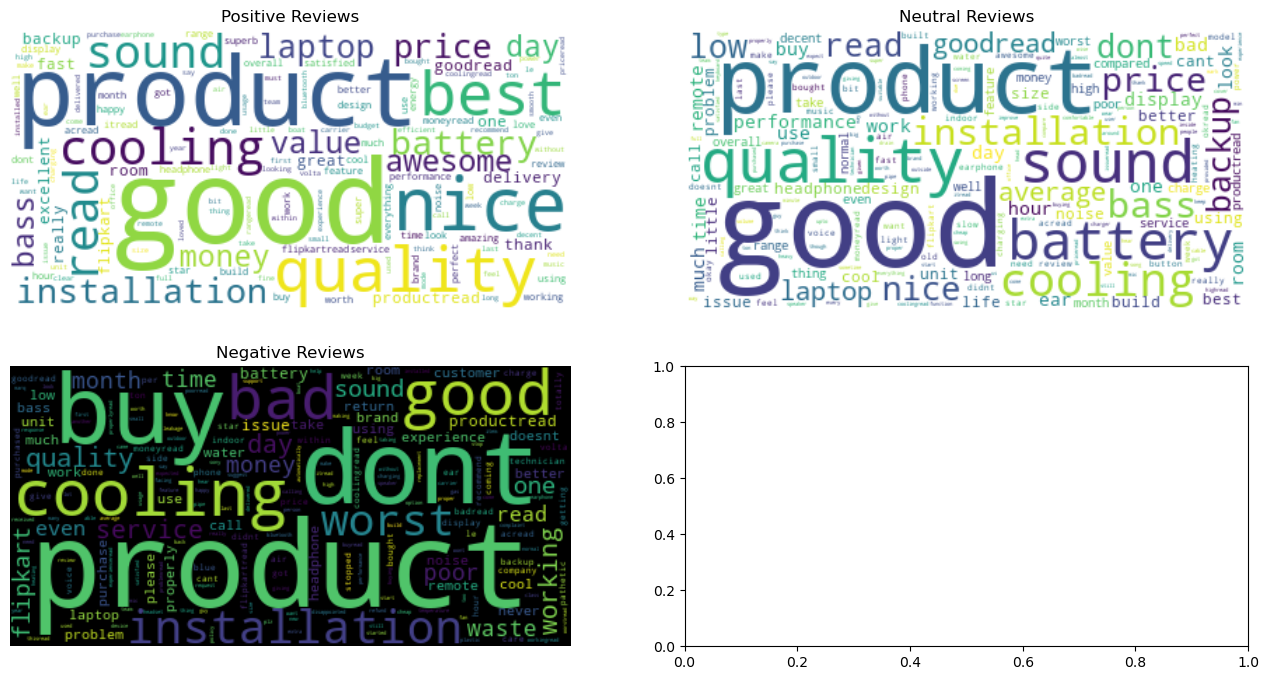

In [13]:
!pip install wordcloud

from wordcloud import WordCloud

fig, axs = plt.subplots(2,2 , figsize=(16,8))
text_pos = " ".join(df['cleaned_reviews'][df.bin_label == 'positive'])
text_neu = " ".join(df['cleaned_reviews'][df.bin_label == 'neutral'])
text_neg = " ".join(df['cleaned_reviews'][df.bin_label == 'negative'])

train_cloud_pos = WordCloud(collocations = False, background_color = 'white').generate(text_pos)
train_cloud_neu = WordCloud(collocations = False, background_color = 'white').generate(text_neu)
train_cloud_neg = WordCloud(collocations = False, background_color = 'black').generate(text_neg)

axs[0][0].imshow(train_cloud_pos, interpolation='bilinear')
axs[0][0].axis('off')
axs[0][0].set_title('Positive Reviews')

axs[0][1].imshow(train_cloud_neu, interpolation='bilinear')
axs[0][1].axis('off')
axs[0][1].set_title('Neutral Reviews')

axs[1][0].imshow(train_cloud_neg, interpolation='bilinear')
axs[1][0].axis('off')
axs[1][0].set_title('Negative Reviews')

plt.show()

In [14]:
df = df[['cleaned_reviews', 'bin_label']]
df.head(3)

,cleaned_reviews,bin_label
0,review monthbest performanceproslow noiseexcel...,positive
1,volta damn good 10x10 room get cold night swit...,positive
2,bought one day ago 32850 400 stabilizer analys...,positive


In [15]:
reviews = df['cleaned_reviews']
ratings = df['bin_label']

# Bag of Words

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(stop_words='english', analyzer='word', binary=True)

In [17]:
bow_features = bow.fit(reviews)

In [18]:
bow_features.get_feature_names_out()

array(['000read', '03052022', '040623', ..., 'zoom', 'zsound', 'zyada'],
      dtype=object)

In [19]:
bow_features = bow.transform(reviews)

In [20]:
bow_features = bow_features.toarray()

In [21]:
len(bow.get_feature_names_out())

10765

#### applying SMOTE 

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(bow_features, ratings)

In [23]:
from collections import Counter
Counter(ratings)

Counter({'positive': 6560, 'negative': 1560, 'neutral': 575})

In [24]:
from collections import Counter
Counter(y_resampled)

Counter({'positive': 6560, 'negative': 6560, 'neutral': 6560})

#### applying One Hot Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_resampled)
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
y_onehot = onehot_encoder.fit_transform(integer_encoded.reshape(-1, 1))

In [26]:
y_onehot

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [27]:
### splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_onehot, test_size=0.33, random_state=42)

### applying Random Forest Classifier with BOW

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred = rf_classifier.predict(X_test)

In [30]:
y_pred_labels = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))

In [31]:
accuracy = accuracy_score(label_encoder.inverse_transform(np.argmax(y_test, axis=1)), y_pred_labels)
print(f"Accuracy: {round(accuracy*100)} %")

Accuracy: 89 %


In [32]:
print("Classification Report:")
print(classification_report(label_encoder.inverse_transform(np.argmax(y_test, axis=1)), y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

    negative       0.89      0.96      0.92      4326
     neutral       0.90      0.77      0.83      2169

    accuracy                           0.89      6495
   macro avg       0.89      0.86      0.88      6495
weighted avg       0.89      0.89      0.89      6495



### applying Naive Bayes

In [34]:
label_encoder = LabelEncoder()
y_integer_encoded = label_encoder.fit_transform(y_resampled)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_integer_encoded, test_size=0.33, random_state=42)

In [37]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [38]:
y_pred = nb_classifier.predict(X_test)

In [39]:
y_pred_labels = label_encoder.inverse_transform(y_pred)

In [40]:
accuracy = accuracy_score(label_encoder.inverse_transform(y_test), y_pred_labels)
print(f"Accuracy: {round(accuracy*100)} %")

Accuracy: 69 %


In [41]:
print("Classification Report:")
print(classification_report(label_encoder.inverse_transform(y_test), y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

    negative       0.63      0.80      0.71      2125
     neutral       0.63      0.47      0.54      2201
    positive       0.80      0.80      0.80      2169

    accuracy                           0.69      6495
   macro avg       0.69      0.69      0.68      6495
weighted avg       0.69      0.69      0.68      6495



# Tf-Idf and N-gram

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_tfidf = vectorizer.fit_transform(reviews)

#### applying SMOTE

In [43]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_tfidf, ratings)

In [44]:
Counter(y_resampled)

Counter({'positive': 6560, 'negative': 6560, 'neutral': 6560})

#### applying OHE

In [45]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(y_resampled)
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
y_onehot = onehot_encoder.fit_transform(integer_encoded.reshape(-1, 1))

In [46]:
y_onehot

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_onehot, test_size=0.33, random_state=42)

### applying Random Forest Clf with Tf-Idf

In [48]:
rf_classifier_tf = RandomForestClassifier(random_state=42)
rf_classifier_tf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
y_pred = rf_classifier_tf.predict(X_test)

In [50]:
y_pred_labels = label_encoder.inverse_transform(np.argmax(y_pred, axis=1))

In [51]:
accuracy = accuracy_score(label_encoder.inverse_transform(np.argmax(y_test, axis=1)), y_pred_labels)
print(f"Accuracy: {round(accuracy*100)} %")

Accuracy: 95 %


In [52]:
print("Classification Report:")
print(classification_report(label_encoder.inverse_transform(np.argmax(y_test, axis=1)), y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

    negative       0.95      0.98      0.96      4326
     neutral       0.95      0.90      0.93      2169

    accuracy                           0.95      6495
   macro avg       0.95      0.94      0.95      6495
weighted avg       0.95      0.95      0.95      6495



### applying Naive Bayes with Tf-Idf

In [53]:
label_encoder = LabelEncoder()
y_integer_encoded = label_encoder.fit_transform(y_resampled)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_integer_encoded, test_size=0.33, random_state=42)

In [55]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [56]:
y_pred = nb_classifier.predict(X_test)

In [57]:
y_pred_labels = label_encoder.inverse_transform(y_pred)

In [58]:
accuracy = accuracy_score(label_encoder.inverse_transform(y_test), y_pred_labels)
print(f"Accuracy: {round(accuracy*100)} %")

Accuracy: 90 %


In [59]:
print("Classification Report:")
print(classification_report(label_encoder.inverse_transform(y_test), y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

    negative       0.93      0.95      0.94      2125
     neutral       0.84      0.95      0.89      2201
    positive       0.95      0.79      0.86      2169

    accuracy                           0.90      6495
   macro avg       0.90      0.90      0.90      6495
weighted avg       0.90      0.90      0.90      6495

